# Dataset


1 - O dataset escolhido para a realização deste trabalho, foi a listagem de produtos da Nike com sua avaliação.
https://www.kaggle.com/datasets/thedevastator/nike-usa-products-prices-descriptions-and-custom

In [ ]:
#importação de biblioteca
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from locale import normalize
import plotly.express as px;

In [ ]:
data = pd.read_csv('nike_data_2022_09.csv', engine="python")

In [ ]:
data.head()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            112 non-null    int64  
 1   url              112 non-null    object 
 2   name             112 non-null    object 
 3   sub_title        112 non-null    object 
 4   brand            112 non-null    object 
 5   model            112 non-null    int64  
 6   color            110 non-null    object 
 7   price            112 non-null    float64
 8   currency         112 non-null    object 
 9   availability     108 non-null    object 
 10  description      112 non-null    object 
 11  raw_description  112 non-null    object 
 12  avg_rating       23 non-null     float64
 13  review_count     23 non-null     float64
 14  images           108 non-null    object 
 15  available_sizes  56 non-null     object 
 16  uniq_id          112 non-null    object 
 17  scraped_at      

In [ ]:
#Preenche valores vazios com 0
data['avg_rating'] = data['avg_rating'].fillna(0)
data['review_count'] = data['review_count'].fillna(0)
data['available_sizes'] = data['available_sizes'].fillna(0)


In [ ]:
#Verifica se há valores nulos
data.isnull().sum()

index              0
url                0
name               0
sub_title          0
brand              0
model              0
color              2
price              0
currency           0
availability       4
description        0
raw_description    0
avg_rating         0
review_count       0
images             4
available_sizes    0
uniq_id            0
scraped_at         0
dtype: int64

In [ ]:
#Separando os valores númericos do dataset
df = data[['model','price','avg_rating', 'review_count']]

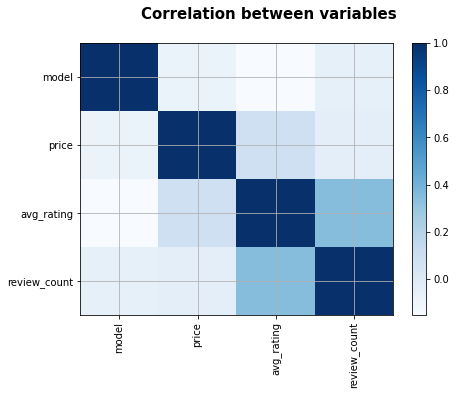

In [ ]:
corr =df.corr()
plt.figure(figsize=(7,5))
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid()
plt.show()

# Análise de dados

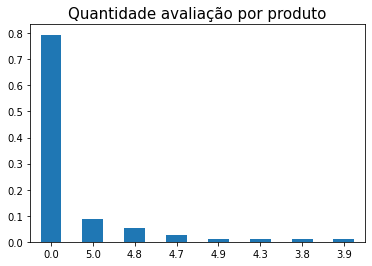

In [ ]:
df['avg_rating'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 'horizontal');
plt.title('Quantidade avaliação por produto', fontsize = 15);

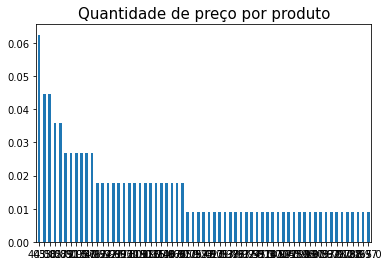

In [ ]:
df['price'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 'horizontal');
plt.title('Quantidade de preço por produto', fontsize = 15);

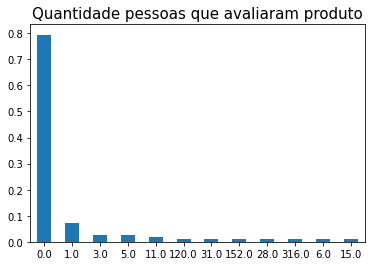

In [ ]:
df['review_count'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 'horizontal');
plt.title('Quantidade pessoas que avaliaram produto', fontsize = 15);

Através dos gráficos conseguimos verificar que existe uma grande variedade de valores, em que questão de preço e quantidade de pessoas que avaliam os produtos. Também deverá ser sensível durante a análise dos dados pois existe um desbalancemanto. 

> Media de valores 

In [ ]:
labels = list(df['avg_rating'].unique())
labels

[0.0, 5.0, 4.9, 4.8, 4.7, 4.3, 3.8, 3.9]

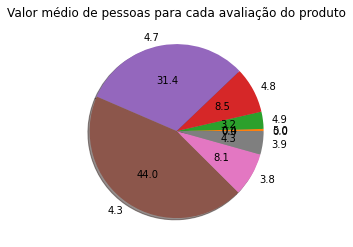

In [ ]:
values = []
for x in labels:
    y = df[df['avg_rating']==x]['review_count'].mean()
    values.append(y)
    
plt.title('Valor médio de pessoas para cada avaliação do produto')
plt.pie(values, labels=labels, autopct='%1.1f', shadow=True)
plt.show()

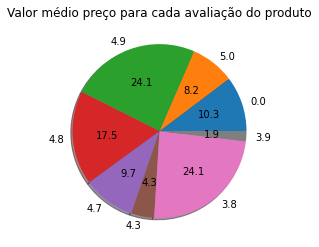

In [ ]:
values = []
for x in labels:
    y = df[df['avg_rating']==x]['price'].mean()
    values.append(y)
    
plt.title('Valor médio preço para cada avaliação do produto')
plt.pie(values, labels=labels, autopct='%1.1f', shadow=True)
plt.show()

De acordo com a análise dos gráficos é possível identificar que em média o valores dos produtos que são avaliados são superiores aos que tem,  que em sua maioria os produtos não são avaliados. E dentro daqueles que avaliam, boa parte são positivas. 


> Histograma

In [ ]:
labels

[0.0, 5.0, 4.9, 4.8, 4.7, 4.3, 3.8, 3.9]

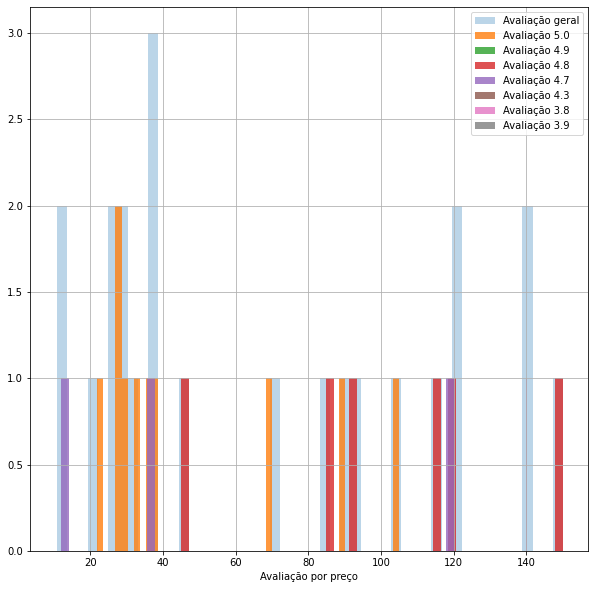

In [ ]:
labels_2 = [5.0, 4.9, 4.8, 4.7, 4.3, 3.8, 3.9]
plt.figure(figsize=(10,10))
plt.xlabel('Avaliação por preço')

df[df['avg_rating'] > 0]['price'].hist(alpha=0.3,bins=50,label="Avaliação geral")

for x in labels_2:    
    df[df['avg_rating']==x]['price'].hist(alpha=0.8,bins=50,label="Avaliação %1.1f" % x)

plt.legend();

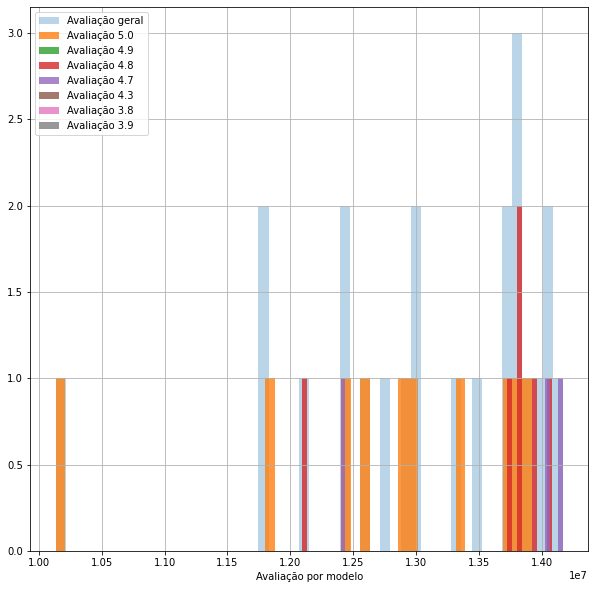

In [ ]:
labels_2 = [5.0, 4.9, 4.8, 4.7, 4.3, 3.8, 3.9]
plt.figure(figsize=(10,10))
plt.xlabel('Avaliação por modelo')
df[df['avg_rating'] > 0]['model'].hist(alpha=0.3,bins=50,label="Avaliação geral")
for x in labels_2:    
    df[df['avg_rating']==x]['model'].hist(alpha=0.8,bins=50,label="Avaliação %1.1f" % x)

plt.legend();

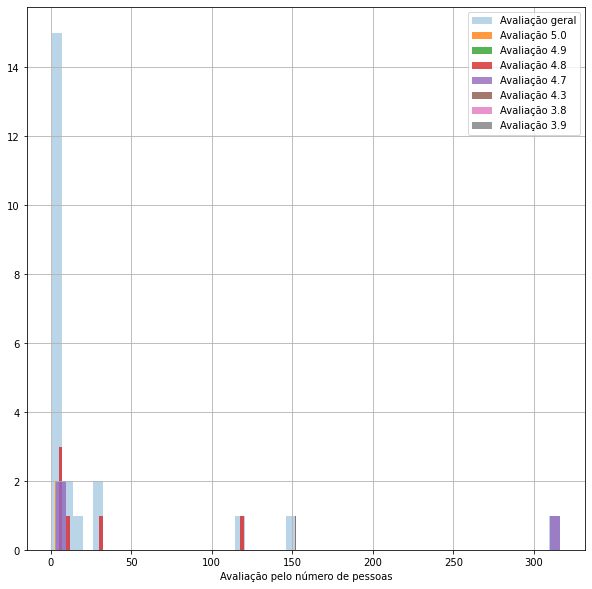

In [ ]:
labels_2 = [5.0, 4.9, 4.8, 4.7, 4.3, 3.8, 3.9]
plt.figure(figsize=(10,10))
plt.xlabel('Avaliação pelo número de pessoas')
df[df['avg_rating'] > 0]['review_count'].hist(alpha=0.3,bins=50,label="Avaliação geral")
for x in labels_2:    
    df[df['avg_rating']==x]['review_count'].hist(alpha=0.8,bins=50,label="Avaliação %1.1f" % x)

plt.legend();

Foi utilizado o histrograma para realizar a comparação entre o comportamento dos dados, em relação ao valores de cada avaliação e geral. Repara-se que quando posto as avaliações como todo, temos uma densidade maior, além que em sua maioria, separadamente, responde ao mesmo comportamento. Com exceção de alguns pontos, o que pode indicar como overfitting. 

> Gráfico de dispersão

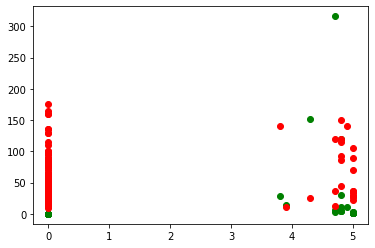

In [ ]:
plt.scatter(df['avg_rating'],df['review_count'],  c='green')  
plt.scatter(df['avg_rating'],df['price'],  c='red')  
plt.show() 

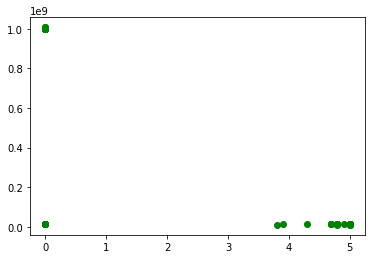

In [ ]:
plt.scatter(df['avg_rating'],df['model'],  c='green')
plt.show() 

Através do gráfico de dispersão, percepemos que não há muita movimentação entre os elementos, ficando concentrado entre os números 0, 4 e 5.  Dentro daqueles que foram analisados percebemos que os mais tem dispersão é o preço, principalmente quando se aproxima do valor 5. 
No caso do número que pessoas que avaliaram e o modelo do produto,  percebemos que existe casos que estão isolados, podendo ser overfitting.